In [1]:
#Loading packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy import stats
from sklearn.tree import DecisionTreeRegressor


In [2]:
zhome_values_zip = pd.read_csv('data/clean/zhome_value.csv')

df = pd.DataFrame(zhome_values_zip)

In [3]:
df

,zip_code,state,city,borough,date,home_value
0,11368,NY,New York,QUEENS,2002-01-31,249885.0
1,11385,NY,New York,QUEENS,2002-01-31,333404.0
2,11236,NY,New York,BROOKLYN,2002-01-31,255687.0
3,11208,NY,New York,BROOKLYN,2002-01-31,235676.0
4,10467,NY,New York,BRONX,2002-01-31,174696.0
...,...,...,...,...,...,...
43058,10464,NY,New York,BRONX,2022-10-31,609781.0
43059,10004,NY,New York,MANHATTAN,2022-10-31,1081807.0
43060,10006,NY,New York,MANHATTAN,2022-10-31,902566.0
43061,11243,NY,New York,BROOKLYN,2022-10-31,1426544.0


In [ ]:
sns.heatmap(df.pivot_table(index='borough', columns='zip_code', values='home_value', aggfunc='mean'))
plt.xlabel('Zip code')
plt.ylabel('Borough')
plt.title('Value of Homes in Zipcode')
plt.show()

In [4]:
df_mean = df.groupby(['zip_code', 'borough']).home_value.mean().reset_index()

df_mean.sort_values(by='home_value', ascending=False, inplace=True)

print(df_mean)

    zip_code    borough    home_value
41     10118  MANHATTAN  2.953885e+06
11     10013  MANHATTAN  2.651030e+06
6      10007  MANHATTAN  2.641340e+06
44     10282  MANHATTAN  2.158213e+06
10     10012  MANHATTAN  1.998542e+06
..       ...        ...           ...
57     10451      BRONX  3.156599e+05
62     10456      BRONX  3.130362e+05
73     10467      BRONX  2.999500e+05
74     10468      BRONX  2.118511e+05
68     10462      BRONX  1.466952e+05

[177 rows x 3 columns]


In [ ]:
df_mean.head(50)

In [5]:
#MANHATTAN TOP 5 ZIP CODES

df_manhattan= df_mean[df_mean['borough'].isin(['MANHATTAN'])]

# Sort the rows by home value in descending order
df_manhattan = df_manhattan.sort_values(by='home_value', ascending=False)

# Select the top 2 rows
manhattan_top_5 = df_manhattan.head(5)

# Print the resulting dataframe
print(manhattan_top_5)

#QUEENS TOP 5 ZIPCODES
df_queens= df_mean[df_mean['borough'].isin(['QUEENS'])]

# Sort the rows by home value in descending order
df_queens = df_queens.sort_values(by='home_value', ascending=False)

# Select the top 2 rows
queens_top_5 = df_queens.head(5)

# Print the resulting dataframe
print(queens_top_5)


#BK TOP 5 ZIPCODES
df_brooklyn= df_mean[df_mean['borough'].isin(['BROOKLYN'])]

# Sort the rows by home value in descending order
df_brooklyn = df_brooklyn.sort_values(by='home_value', ascending=False)

# Select the top 2 rows
bk_top_5 = df_brooklyn.head(5)

# Print the resulting dataframe
print(bk_top_5)

#STATEN ILAND TOP 5 ZIPCODES
df_staten= df_mean[df_mean['borough'].isin(['STATEN_ISLAND'])]

# Sort the rows by home value in descending order
df_staten = df_staten.sort_values(by='home_value', ascending=False)

# Select the top 2 rows
staten_top_5 = df_staten.head(5)

# Print the resulting dataframe
print(staten_top_5)


#BRONX TOP 5 ZIPCODES
df_bronx= df_mean[df_mean['borough'].isin(['BRONX'])]

# Sort the rows by home value in descending order
df_bronx = df_bronx.sort_values(by='home_value', ascending=False)

# Select the top 2 rows
bronx_top_5 = df_bronx.head(5)

# Print the resulting dataframe
print(bronx_top_5)

    zip_code    borough    home_value
41     10118  MANHATTAN  2.953885e+06
11     10013  MANHATTAN  2.651030e+06
6      10007  MANHATTAN  2.641340e+06
44     10282  MANHATTAN  2.158213e+06
10     10012  MANHATTAN  1.998542e+06
     zip_code borough     home_value
135     11363  QUEENS  888125.755020
130     11357  QUEENS  719995.036000
134     11362  QUEENS  714293.755020
131     11358  QUEENS  700550.180723
86      11105  QUEENS  698675.152000
     zip_code   borough   home_value
103     11217  BROOKLYN  1136523.044
101     11215  BROOKLYN  1094520.928
116     11231  BROOKLYN  1065775.792
88      11201  BROOKLYN  1034488.912
125     11243  BROOKLYN  1021440.880
    zip_code        borough  home_value
51     10307  STATEN_ISLAND  547081.464
53     10309  STATEN_ISLAND  498783.628
50     10306  STATEN_ISLAND  468805.856
55     10312  STATEN_ISLAND  468034.124
45     10301  STATEN_ISLAND  464242.480
    zip_code borough     home_value
77     10471   BRONX  579882.895582
70     10464   B

In [6]:
df_combined = pd.concat([manhattan_top_5, bk_top_5, queens_top_5, bronx_top_5, staten_top_5], axis=0)

# Print the resulting dataframe
print(df_combined)

     zip_code        borough    home_value
41      10118      MANHATTAN  2.953885e+06
11      10013      MANHATTAN  2.651030e+06
6       10007      MANHATTAN  2.641340e+06
44      10282      MANHATTAN  2.158213e+06
10      10012      MANHATTAN  1.998542e+06
103     11217       BROOKLYN  1.136523e+06
101     11215       BROOKLYN  1.094521e+06
116     11231       BROOKLYN  1.065776e+06
88      11201       BROOKLYN  1.034489e+06
125     11243       BROOKLYN  1.021441e+06
135     11363         QUEENS  8.881258e+05
130     11357         QUEENS  7.199950e+05
134     11362         QUEENS  7.142938e+05
131     11358         QUEENS  7.005502e+05
86      11105         QUEENS  6.986752e+05
77      10471          BRONX  5.798829e+05
70      10464          BRONX  5.297708e+05
67      10461          BRONX  4.694018e+05
75      10469          BRONX  4.491432e+05
71      10465          BRONX  4.374839e+05
51      10307  STATEN_ISLAND  5.470815e+05
53      10309  STATEN_ISLAND  4.987836e+05
50      103

In [ ]:
df_mean.head(10)

In [ ]:
sns.heatmap(df.pivot_table(index='borough', columns='zip_code', values='home_value', aggfunc='mean'))
plt.xlabel('Zip code')
plt.ylabel('Borough')
plt.title('Value of Homes in Zipcode')
plt.show()

In [ ]:
df["home_value"].max()

In [ ]:
df["rounded_values"] = df["home_value"].apply(round)


In [ ]:
df["rounded_values"]


TOP 5 ZIPCODES

In [14]:
zip_codes = df.groupby(["zip_code"])["home_value"].mean()


zip_codes_df = zip_codes.to_frame().sort_values("home_value", ascending=False)


top_five = zip_codes_df.head(5)


print(top_five)

            home_value
zip_code              
10118     2.953885e+06
10013     2.651030e+06
10007     2.641340e+06
10282     2.158213e+06
10012     1.998542e+06


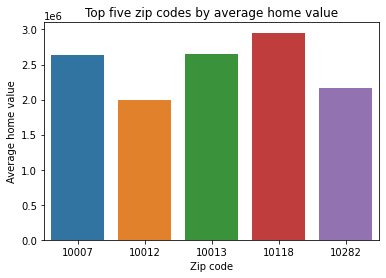

In [15]:
zip_codes = top_five.index
home_values = top_five['home_value']

# Create a bar chart with Seaborn
sns.barplot(x=zip_codes, y=home_values)

# Add labels and show the plot
plt.xlabel('Zip code')
plt.ylabel('Average home value')
plt.title('Zillow Top five zip codes by average home value')
plt.show()

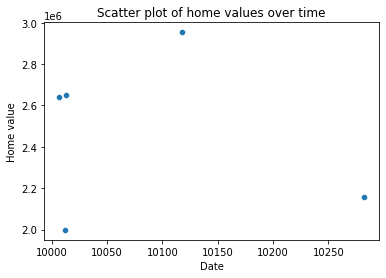

In [16]:
x = top_five.index
y = top_five['home_value']

sns.scatterplot(x=x, y=y)

# Add labels and show the plot
plt.xlabel('Date')
plt.ylabel('Home value')
plt.title('Scatter plot of home values over time')
plt.show()

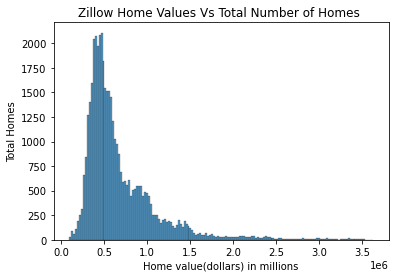

In [19]:
x = df['home_value']

# Create a histogram with Seaborn
sns.histplot(x=x)

# Add labels and show the plot
plt.xlabel('Home value(dollars) in millions')
plt.ylabel('Total Homes')
plt.title('Zillow Home Values Vs Total Number of Homes ')
plt.show()

In [ ]:
top_five[]

BOTTOM FIVE

In [ ]:
zip_codes = df.groupby("zip_code")["home_value"].mean()

# Convert the Series to a DataFrame and sort it by the average in descending order
zip_codes_df = zip_codes.to_frame().sort_values("home_value", ascending=False)

# Select the top five rows
bottom_five = zip_codes_df.tail(5)

# Print the top five zip codes and their average home value
print(bottom_five)

In [ ]:
zip_codes = bottom_five.index
home_values = bottom_five['home_value']

# Create a bar chart with Seaborn
sns.barplot(x=zip_codes, y=home_values)

# Add labels and show the plot
plt.xlabel('Zip code')
plt.ylabel('Average home value')
plt.title('Top five zip codes by average home value')
plt.show()

In [ ]:

pivot_table = df.pivot_table(index="date", columns="borough", values="rounded_values")

print(pivot_table)

In [ ]:
# Extract the 'BRONX' and 'BROOKLYN' columns as separate samples
sample1 = pivot_table["BRONX"]
sample2 = pivot_table["BROOKLYN"]

# Perform the t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

In [ ]:
means = pivot_table[["BRONX", "BROOKLYN"]].mean()

# Perform the t-test
t_statistic, p_value = ttest_ind(pivot_table["BRONX"], pivot_table["BROOKLYN"])

# Create a bar chart
plt.bar(means.index, means.values)

# Add a line showing the t-statistic
plt.axhline(t_statistic, color='r', linestyle="--")

# Add labels and show the plot
plt.xlabel("Borough")
plt.ylabel("Mean value")
plt.title("Mean values by borough (t-test)")
plt.show()

In [ ]:
sns.barplot(x=means.index, y=means.values)

# Add a line showing the t-statistic
plt.axhline(t_statistic, color='r', linestyle='--')

# Add labels and show the plot
plt.xlabel('Borough')
plt.ylabel('Mean value')
plt.title('Mean values by borough (t-test)')
plt.show()

In [ ]:
sample1 = pivot_table["BRONX"]
sample2 = pivot_table["BROOKLYN"]
sample3 = pivot_table["MANHATTAN"]
sample4 = pivot_table["QUEENS"]
sample4 = pivot_table["STATEN_ISLAND"]
# Perform the ANOVA test
f_statistic, p_value = f_oneway(sample1, sample2, sample3, sample4)

print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

In [ ]:

# Calculate the means of the 'BRONX', 'BROOKLYN', 'MANHATTAN', and 'QUEENS' columns
means = pivot_table[["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS","STATEN_ISLAND"]].mean()

# Create a bar chart
plt.bar(means.index, means.values)

# Add labels and show the plot
plt.xlabel('Borough')
plt.ylabel('Mean value')
plt.title('Mean values by borough')
plt.show()

In [ ]:
before_2002 = zhome_values_zip.columns[9:33]
remaining_columns = ['RegionID', 'SizeRank', 'RegionType', 'StateName', 'Metro']

In [ ]:
print(before_2002)
print(remaining_columns)

In [ ]:
# df = df.drop(df.columns[[0, 1, 3]], axis=1)

#dropping columns from data frame we dont need 8 = jan 2000. 31 = dec 2002. 0 = Regiontype. 4=statename. 6= metro. 
df = df.drop(before_2002, axis=1)
df = df.drop(remaining_columns, axis=1)

In [ ]:
#new dataframe

df.columns

In [ ]:
# creating new dataframe with the name of the columns replaced

#df2 = df.rename({'a': 'X', 'b': 'Y'}, axis=1)

new_column_df = df.rename({'RegionName' : 'zip', 'State' : 'state',
                                           'City' : 'city', 'CountyName' : 'borough'}, axis = 1)

In [ ]:
#new dataframe with columns renamed

new_column_df

In [ ]:
#df = df.melt(id_vars=["location", "name"], 
#         var_name="Date", 
#         value_name="Value"

#replacing the '2002-01-31 colums to 'Date' and assiging their values.

df2 = new_column_df.melt(id_vars=['zip', 'state', 'city', 'borough'], 
                                                       var_name= "date", 
                                                       value_name= "home_value")

In [ ]:
#new columns with dates as rows

df2.columns

In [ ]:
df2

In [ ]:
#changing date column to datetime
df2['date'] = pd.to_datetime(df2['date'])

In [ ]:
#    li = ['Albert', 'Louis', 'John']
#    df[df.name.isin(li)]

#creating new df where only the word NY pulls from the State column.

ny_column = ['NY']

ny_home_values = df2[df2.state.isin(ny_column)]

In [ ]:
#new data frame with the column, state, only has NY

ny_home_values

In [ ]:
#selecting only 5 boro counties in county_name column
# Only NYC
five_boros = ny_home_values[ny_home_values['borough'].isin(['Queens County', 'New York County', 'Bronx County', 'Richmond County', 'Kings County'])]

In [ ]:
# new dataframe
five_boros

In [ ]:
mapper = {
    "Bronx County": "BRONX",
    "Kings County":"BROOKLYN",
    "Queens County": "QUEENS",
    "Richmond County": "STATEN_ISLAND",
    "New York County": "MANHATTAN"
}

In [ ]:
five_boros.loc["borough"] = five_boros["borough"].replace(mapper)

In [ ]:
five_boros = five_boros.dropna()

In [ ]:
five_boros.sort_values(by = ['date'], ascending = True)

In [ ]:
pivot_table = five_boros.pivot_table(index="date", columns="borough", values="home_value")

In [ ]:
five_boros.groupby('borough')['home_value'].mean().plot.bar()

In [ ]:
# Find average price of borough over time
formatted_monthly = five_boros["date"].dt.to_period("M")

In [ ]:
monthly_mean_home_value = five_boros.groupby(formatted_monthly)["home_value"].mean().to_frame()

In [ ]:
# The average home price in New York City after the year 2002
monthly_mean_home_value.plot.line()

In [ ]:
def create_mean_borough_home_value(five_boros, boro_name):
    return five_boros[five_boros["borough"] == boro_name].groupby(formatted_monthly)["home_value"].mean().to_frame()

In [ ]:
all_boros = ["BRONX", "MANHATTAN", "QUEENS", "BROOKLYN", "STATEN_ISLAND"]
avg_boro_home_price = [{"name": boro_name, "chart": create_mean_borough_home_value(five_boros, boro_name)}  for boro_name in all_boros]

In [ ]:
# Average home price of each borough over time
print(avg_boro_home_price[0]["chart"].plot.line(title=avg_boro_home_price[0]["name"]))

In [ ]:
print(avg_boro_home_price[1]["chart"].plot.line(title=avg_boro_home_price[1]["name"]))

In [ ]:
print(avg_boro_home_price[2]["chart"].plot.line(title=avg_boro_home_price[2]["name"]))

In [ ]:
print(avg_boro_home_price[3]["chart"].plot.line(title=avg_boro_home_price[3]["name"]))

In [ ]:
print(avg_boro_home_price[4]["chart"].plot.line(title=avg_boro_home_price[4]["name"]))

In [ ]:
#chart using seaborn
#sns.barplot(data = pd.DataFrame(ex_7_1(df)).reset_index(), x = 'BOROUGH', y = 0)
sns.barplot(data = pd.DataFrame(five_boros).reset_index(), x = 'borough', y = 'home_value')

In [ ]:
# CONTINGENCY TABLE

In [ ]:
ax = sns.heatmap(my_contingency_table, cmap="Reds")
ax.set_title("Primary type vs. Location description (counts)")

In [ ]:
#### CODES i was just fooling around with

In [ ]:
axes = df_filtered.plot.line(
...     subplots=True, color={"county_name": "pink", "date": "red", "zip": "green"})

In [ ]:
drop_nulls = five_boros[five_boros["home_value"].isnull() == True]['date'].unique()

In [ ]:
drop_nulls = pd.DataFrame(drop_nulls)

In [ ]:
five_boros['county_name'] = five_boros['county_name'].astype(str)

In [ ]:
five_boros = df_filtered[df_filtered["home_value"].isnull() == True]['date'].unique()

In [ ]:
from datetime import datetime

inputDateList.sort(key=lambda date: datetime.strptime(date, "%m-%Y"))

In [ ]:
.sort_values() #when organizing data in the column 
.astype #convert from int to str to float 